# Import Libraries and Data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score
from scipy.stats import skew, norm
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
from mlxtend.regressor import StackingCVRegressor

In [2]:
train_data=pd.read_csv("train.csv")

In [3]:
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows', 5000)

In [4]:
train_data.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,Gas

In [5]:
train_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


Correlation Matrix to find the importance of features on Sales Price

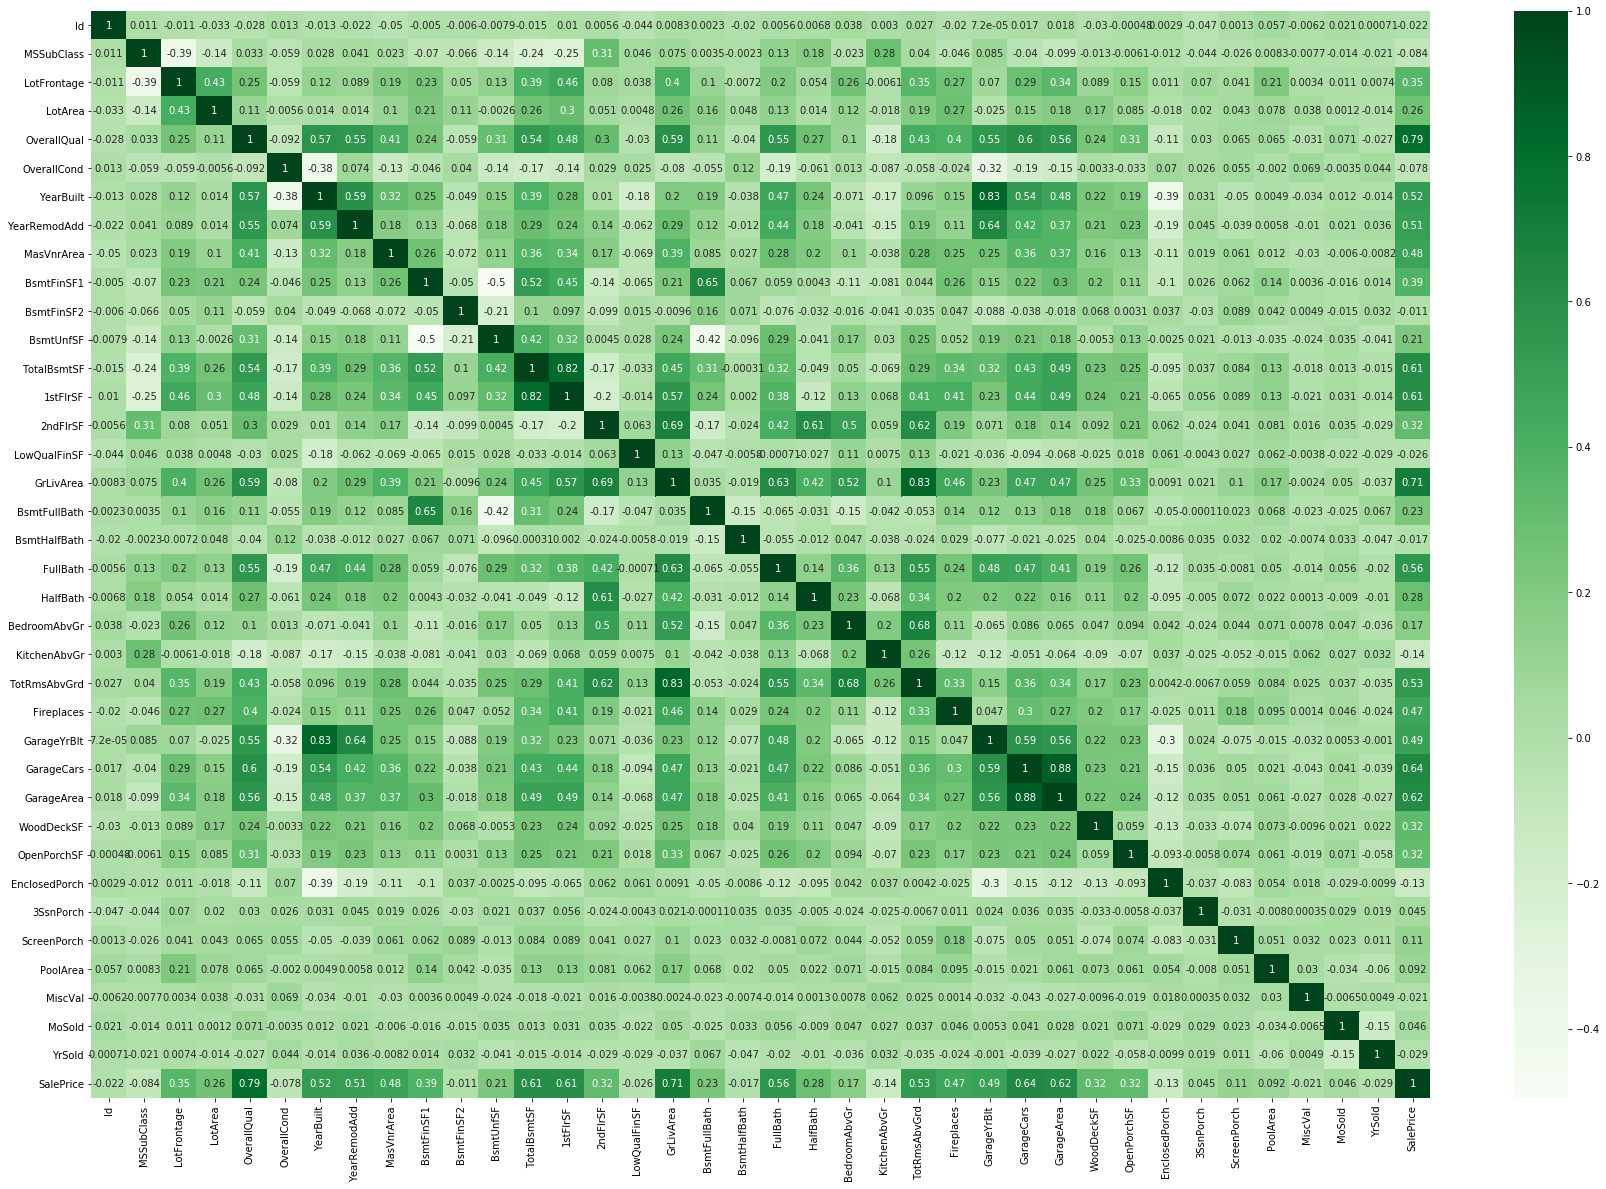

In [15]:
plt.figure(figsize=(30,20))
sns.heatmap(train_data.corr(),annot=True,cmap="Greens")

Here, darker the color of the box more positive the relation of the columns wrt Sales price.
Also, I have inserted the important features in a list.

In [7]:
important_features=[]
for x,y in train_data.corr()["SalePrice"].to_dict().items():
    if ((y>0.1) & (y<0.8) | (y<=-0.1)):
        important_features.append(x)

In [8]:
important_features

['LotFrontage',
 'LotArea',
 'OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'BsmtFullBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch']

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111]),
 <a list of 112 Text xticklabel objects>)

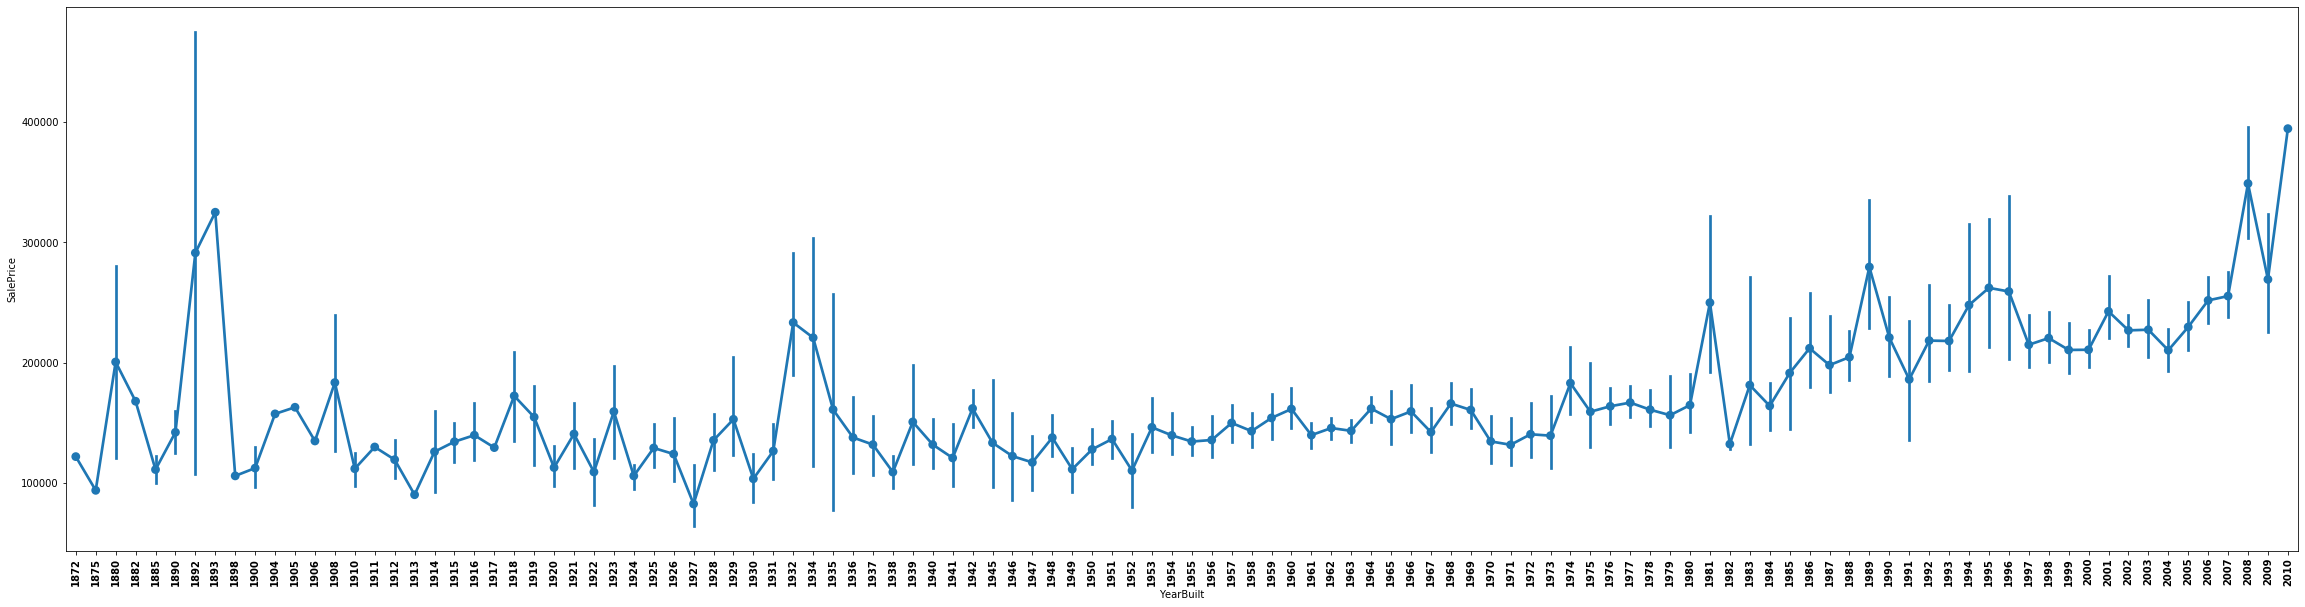

In [9]:
plt.figure(figsize=(40,10))
sns.pointplot(x='YearBuilt', y="SalePrice", data=train_data)
plt.xticks(weight='bold',rotation=90)

The distribution of the Sale Price is positively skewed that means mode is less than median and mean.

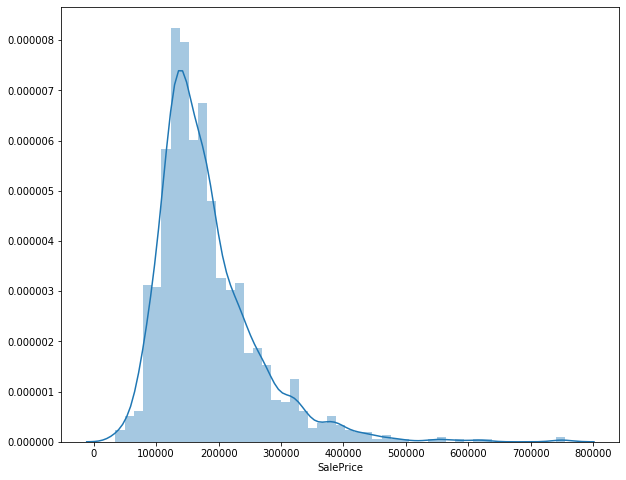

In [10]:
plt.figure(figsize=(10,8))
sns.distplot(train_data["SalePrice"])

So, we are going to change the distribution as normal distribution is preferred in regression.

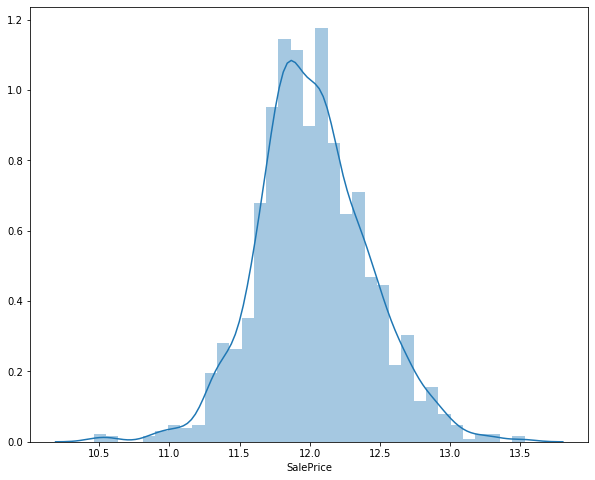

In [11]:
plt.figure(figsize=(10,8))
sns.distplot(np.log1p(train_data["SalePrice"]))


In [12]:
#plt.figure(figsize=(20,10))
#sns.pointplot(x='OverallQual', y="SalePrice", data=train_data)
#plt.xticks(weight='bold')

Important features are plotted against Sale Price to find outliers and remove them.

/Users/vishalduhan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


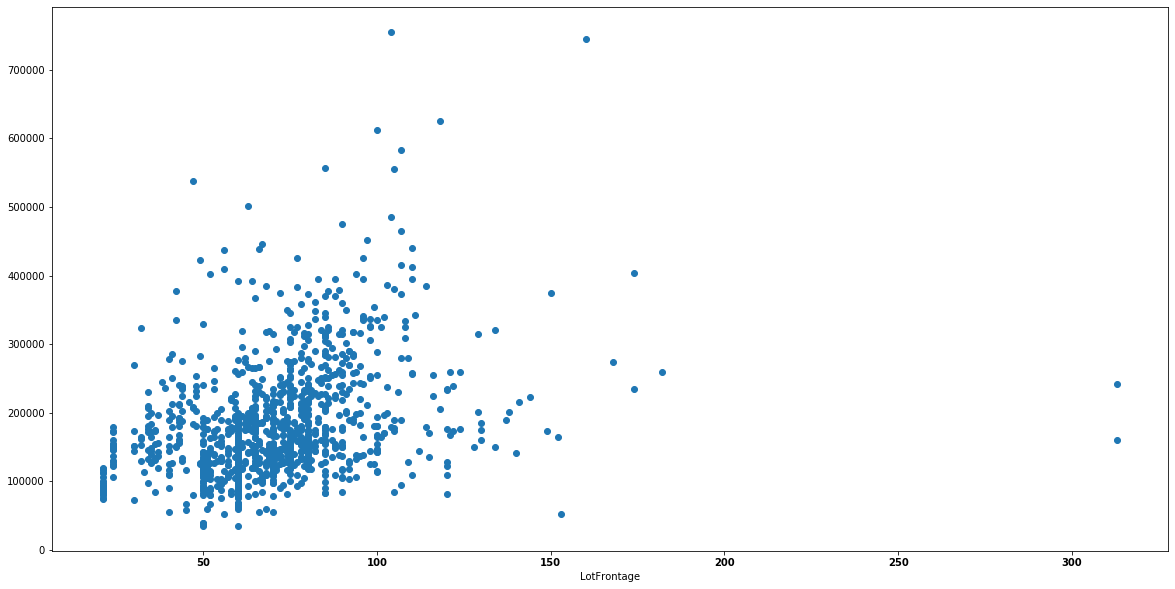

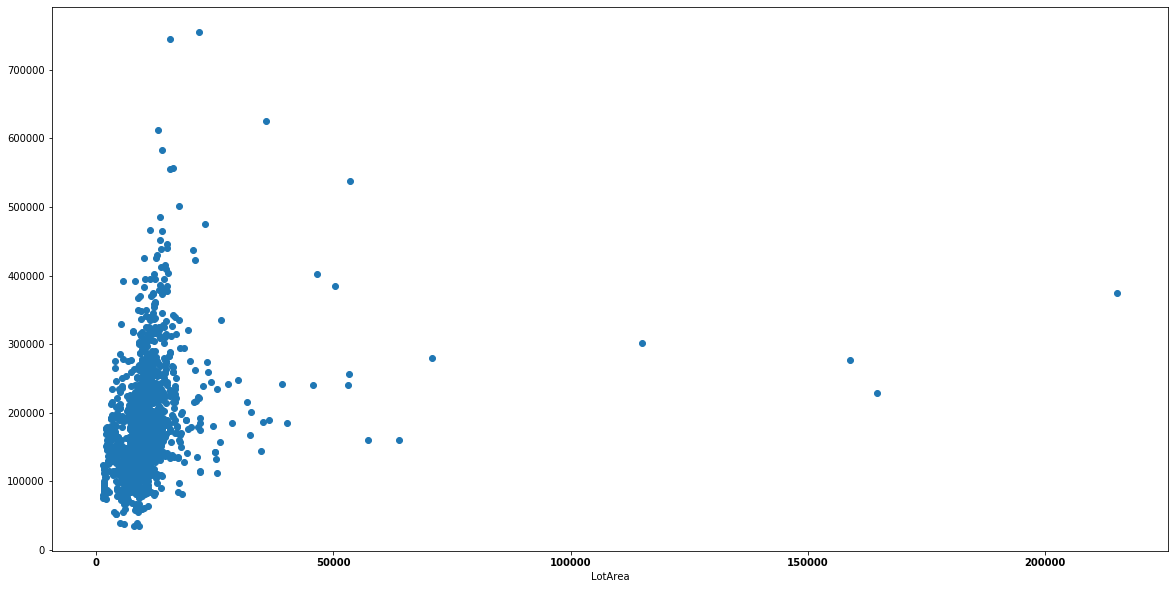

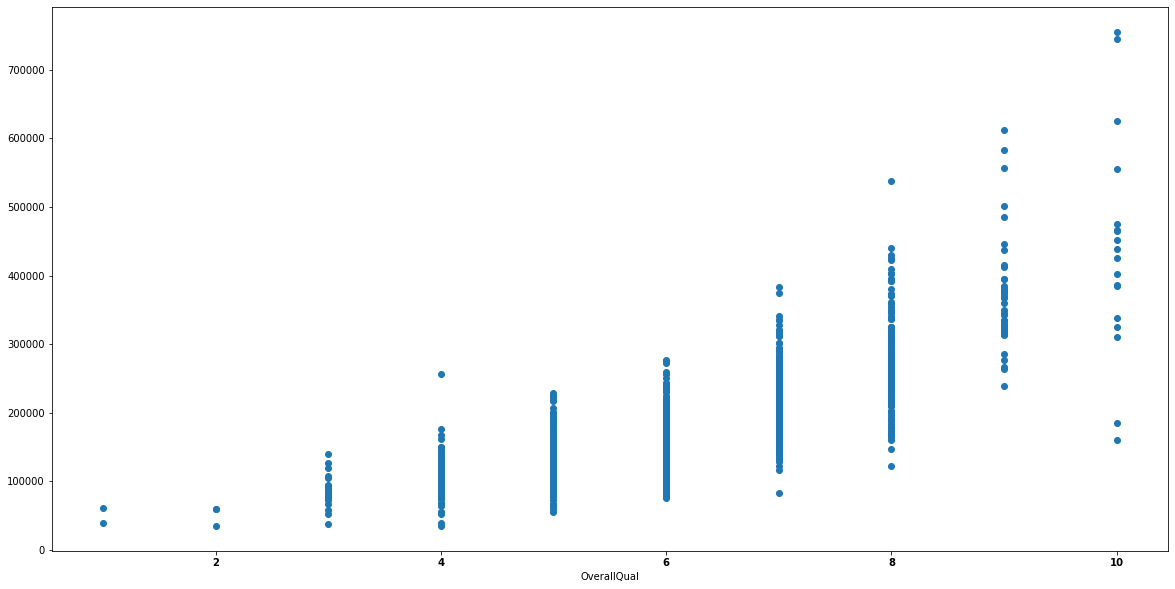

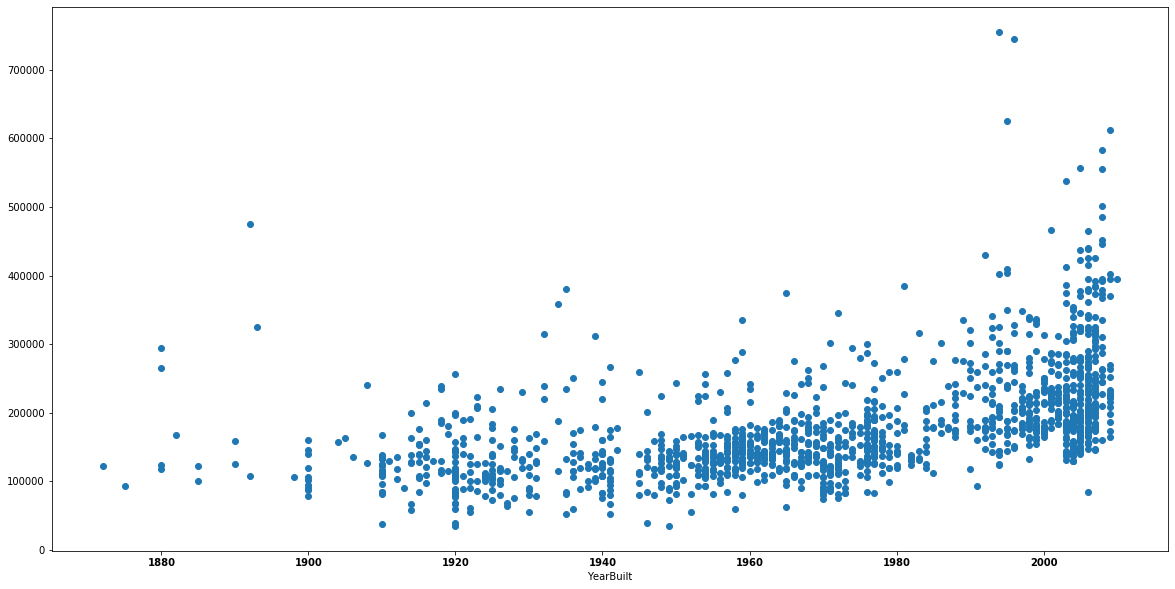

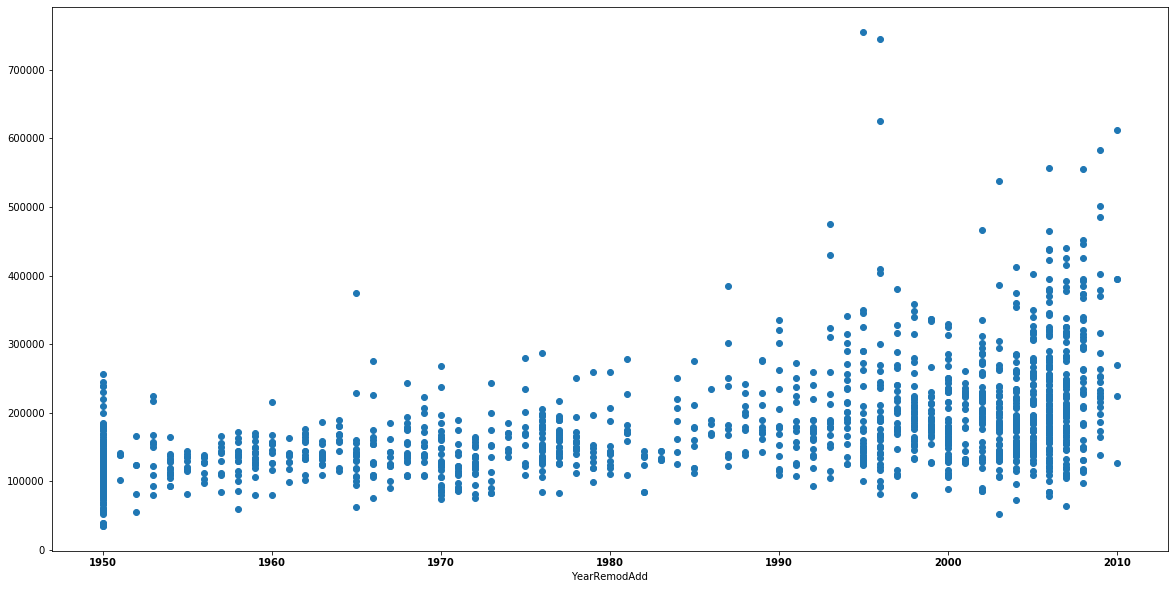

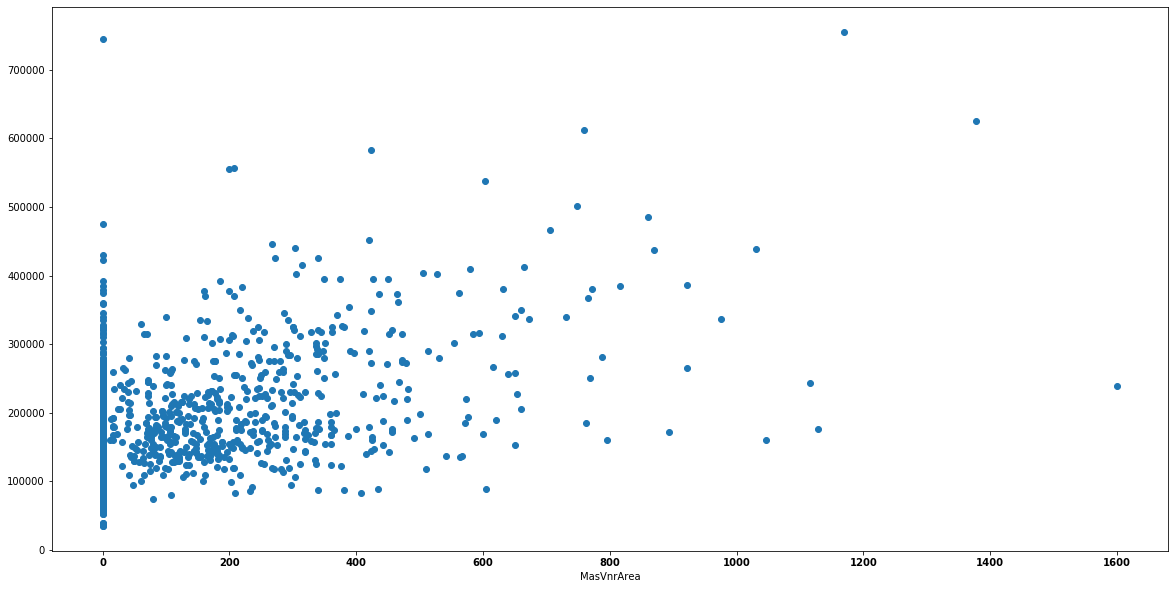

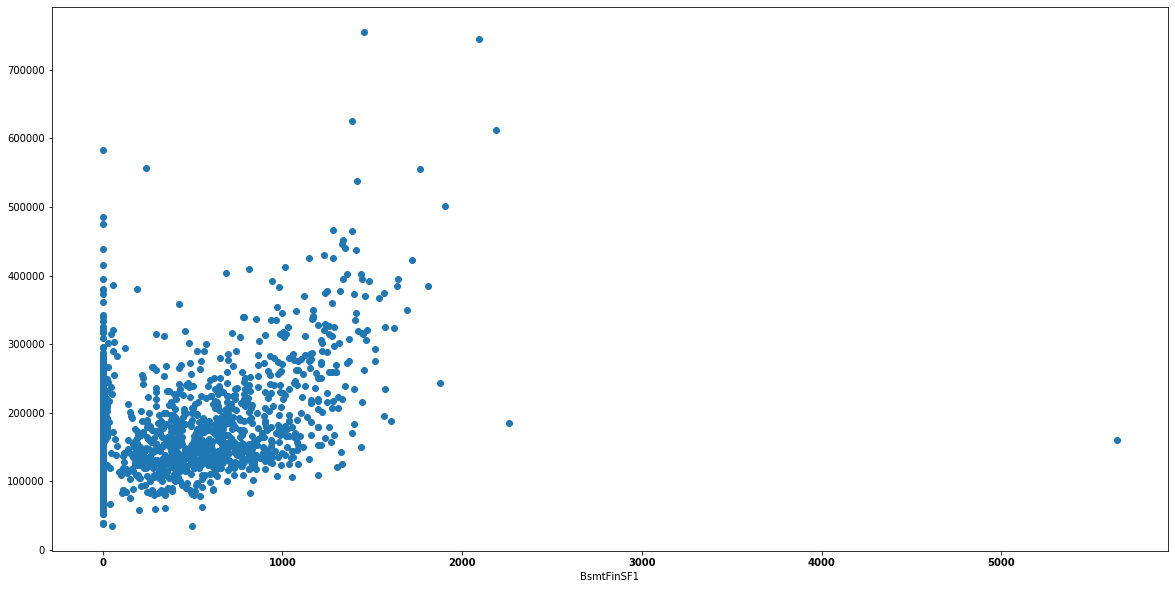

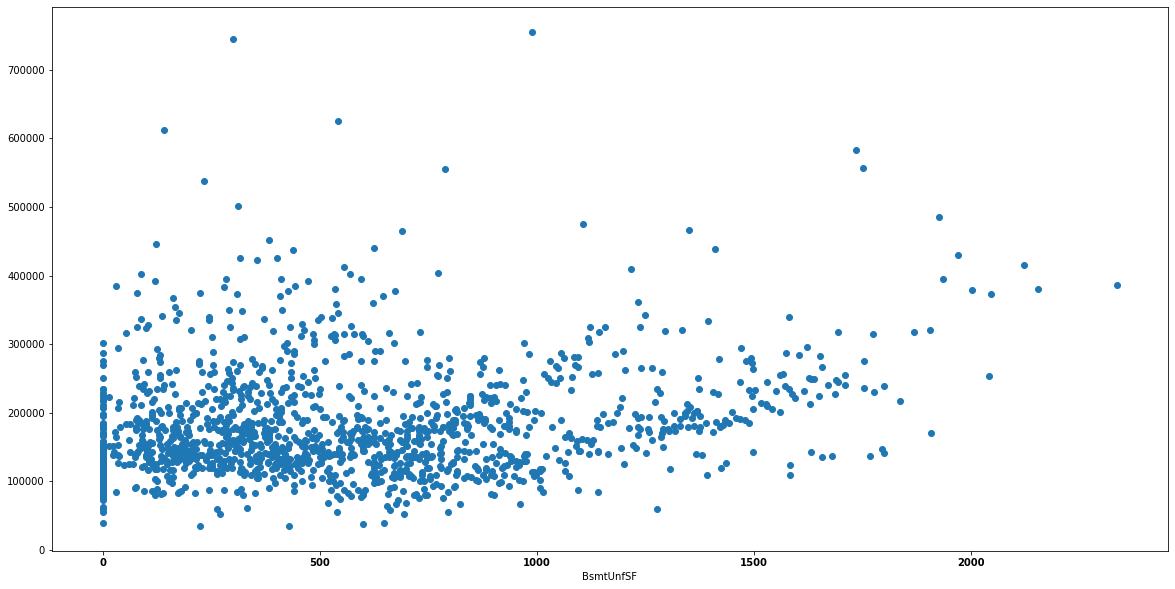

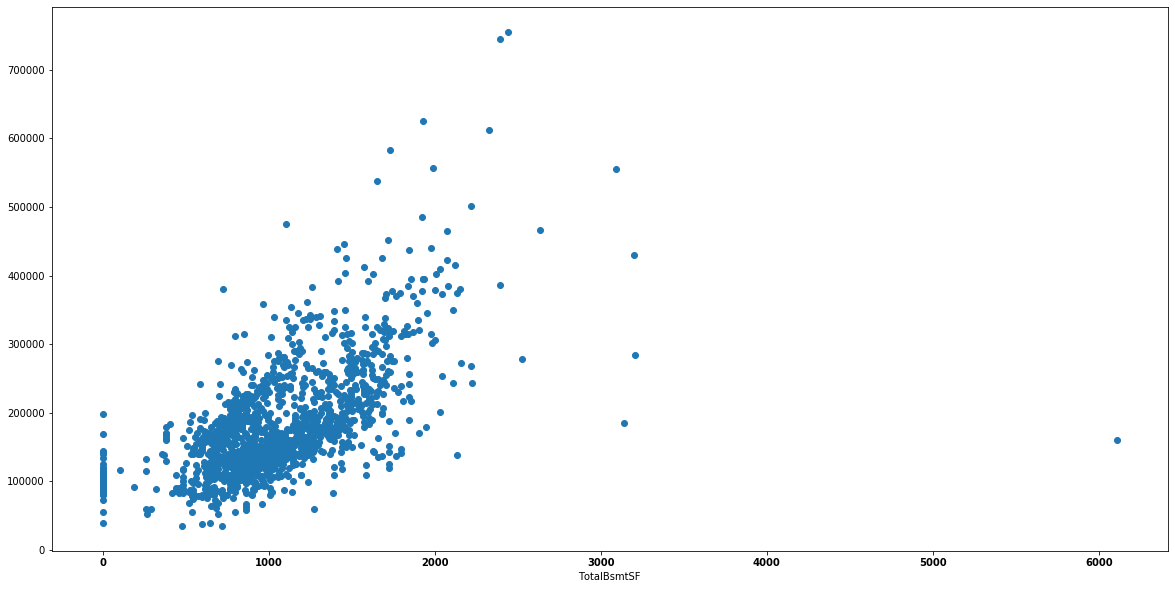

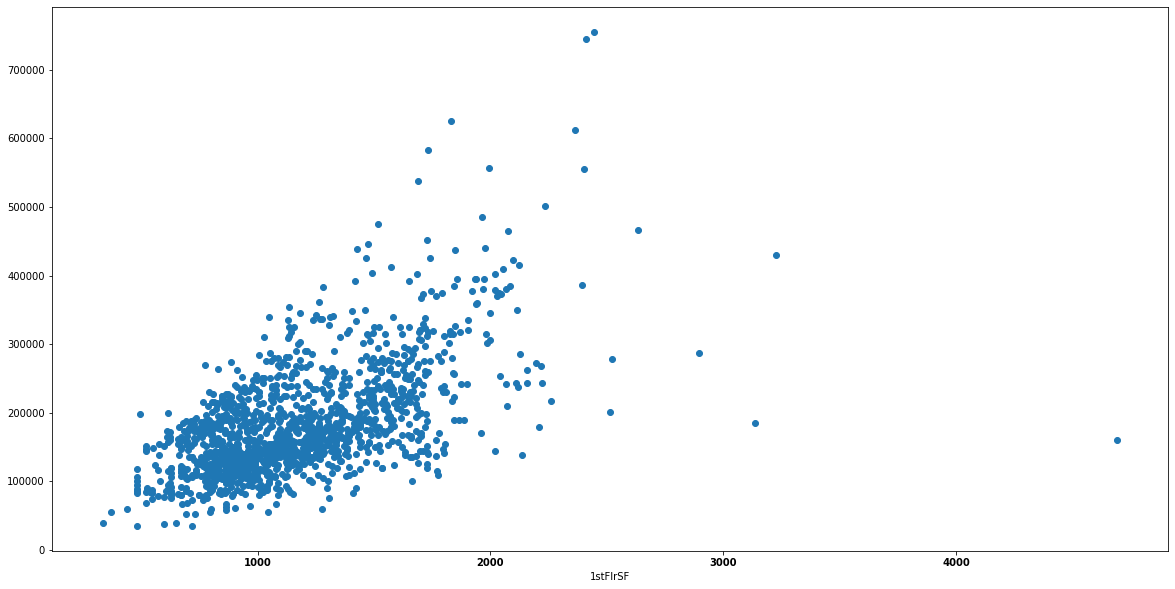

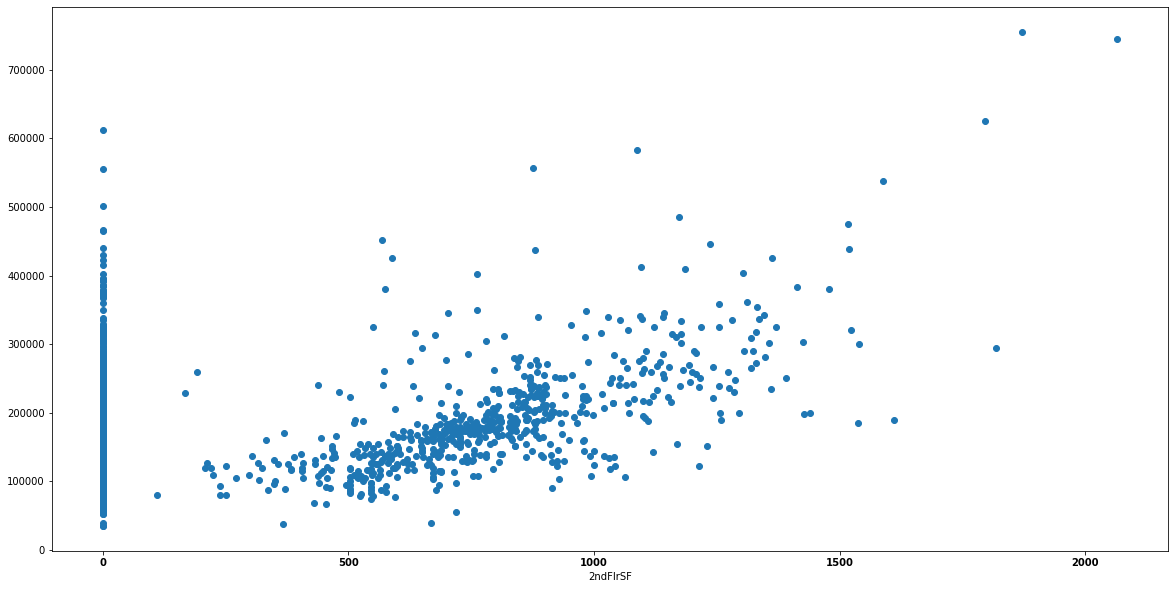

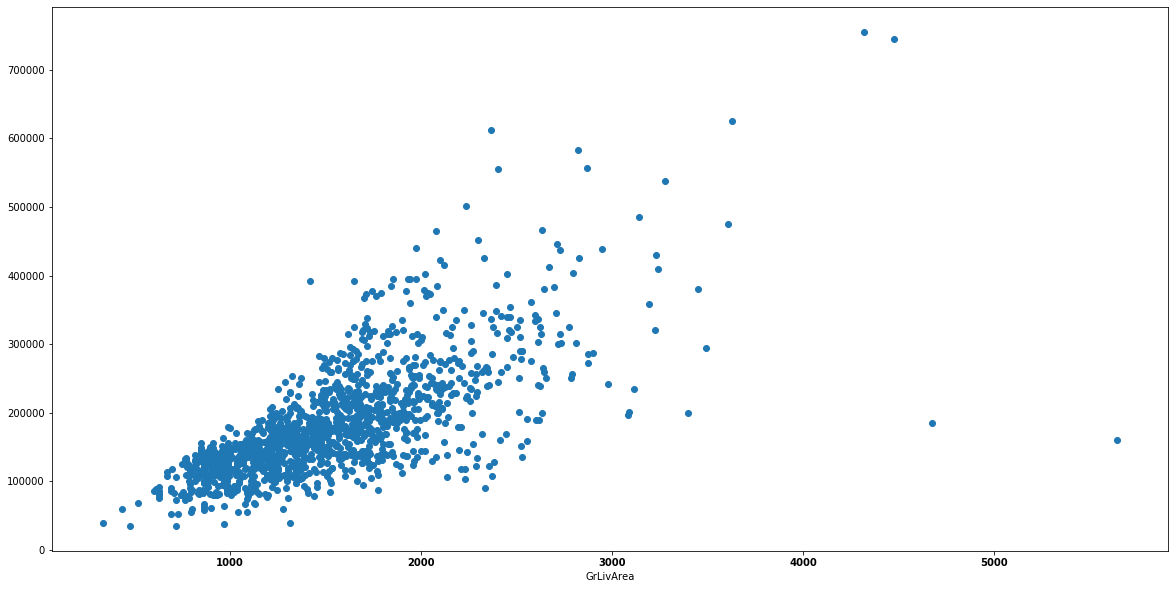

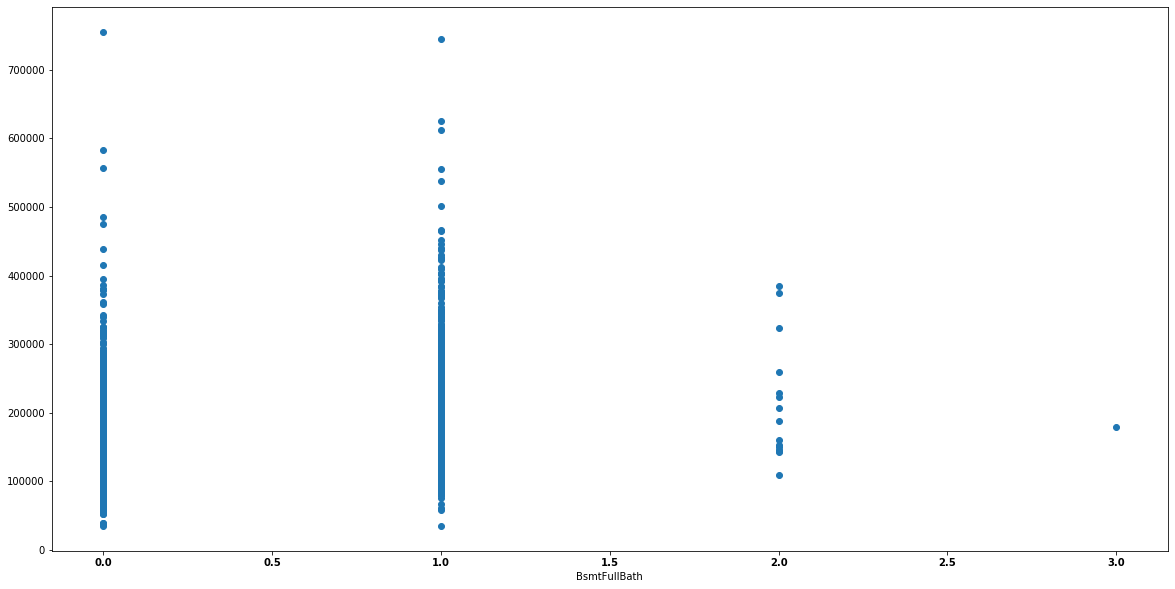

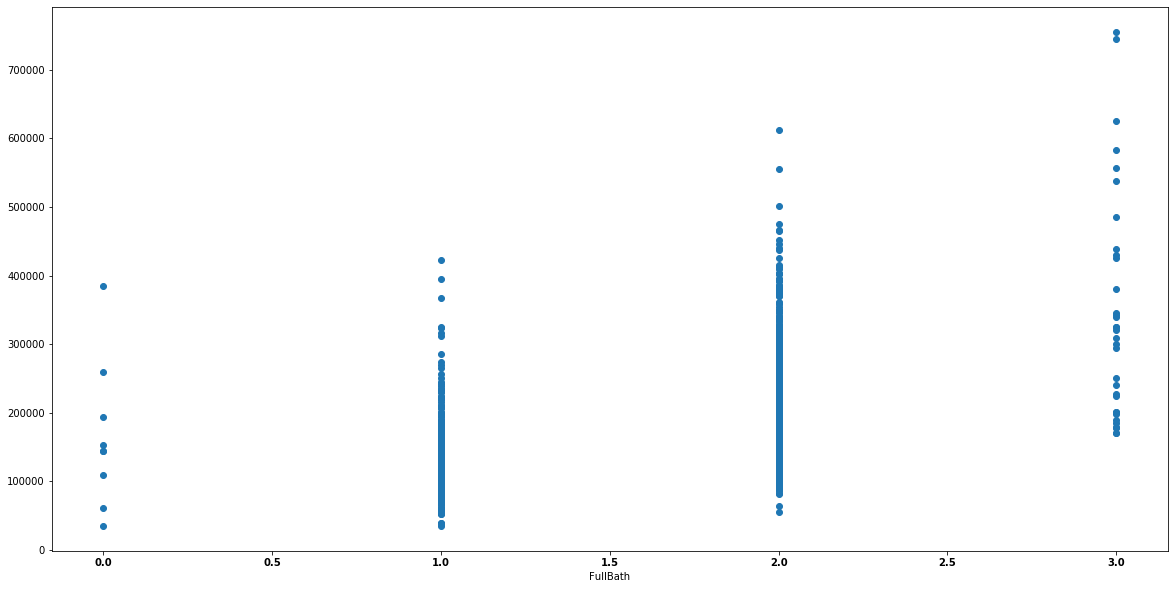

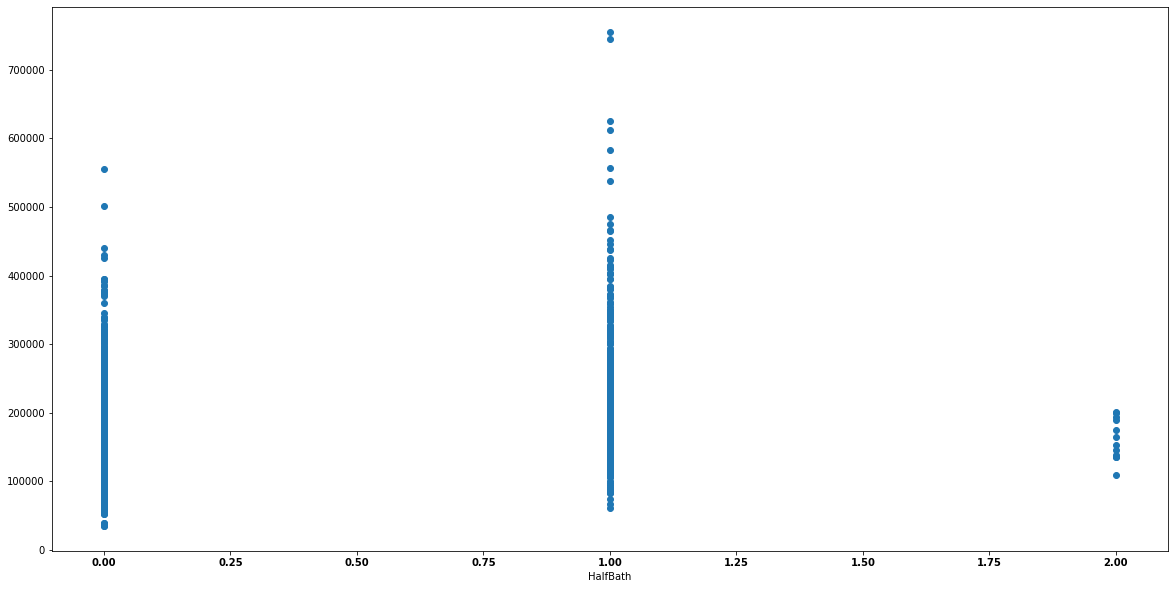

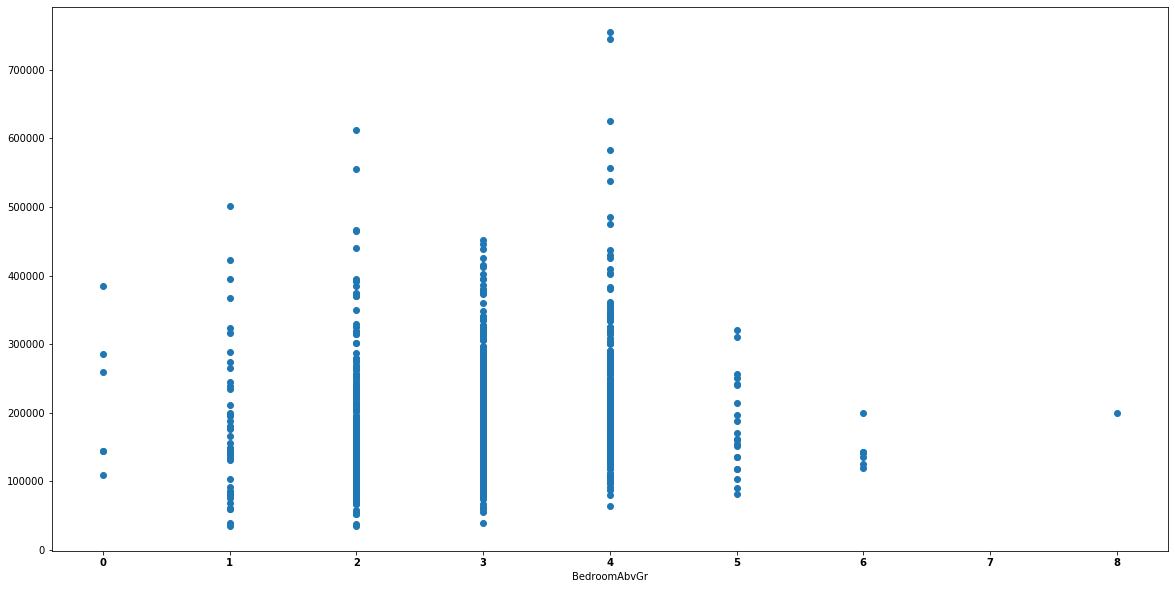

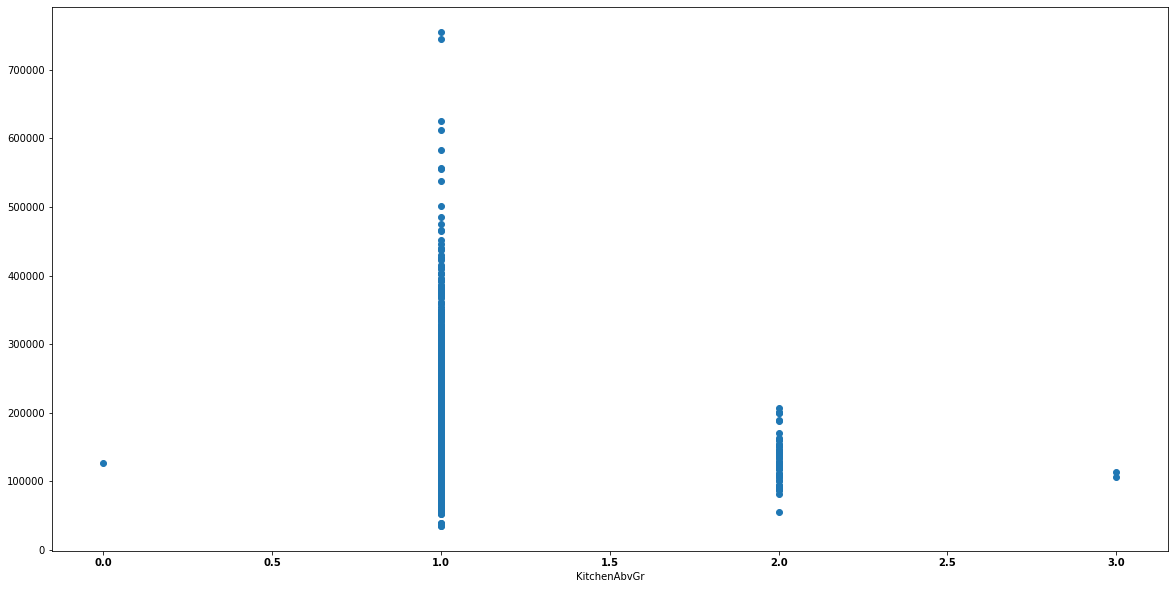

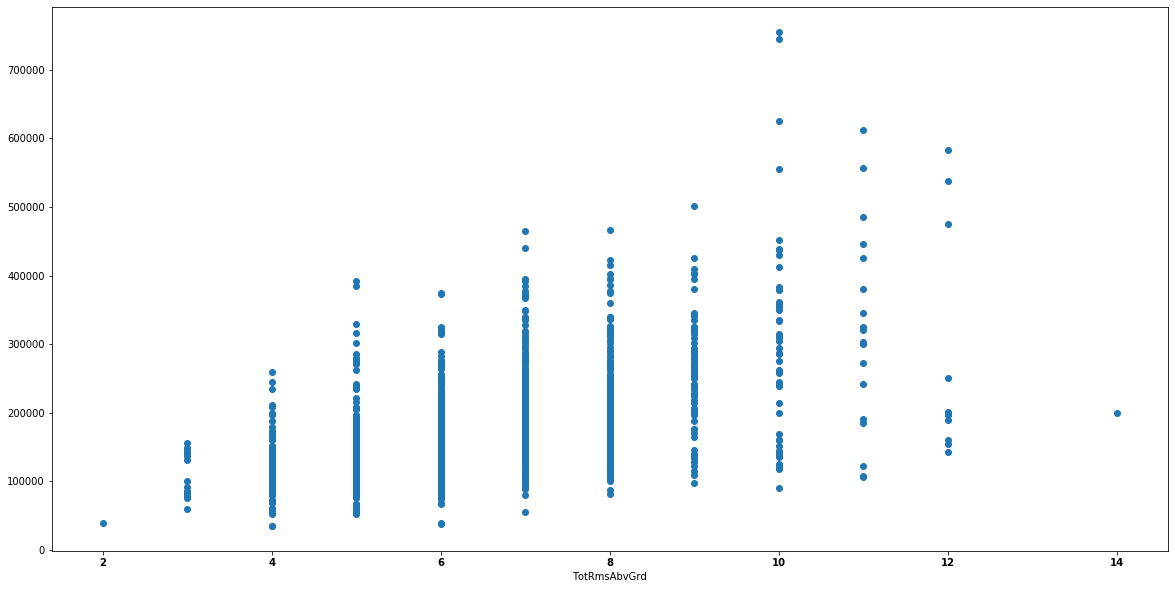

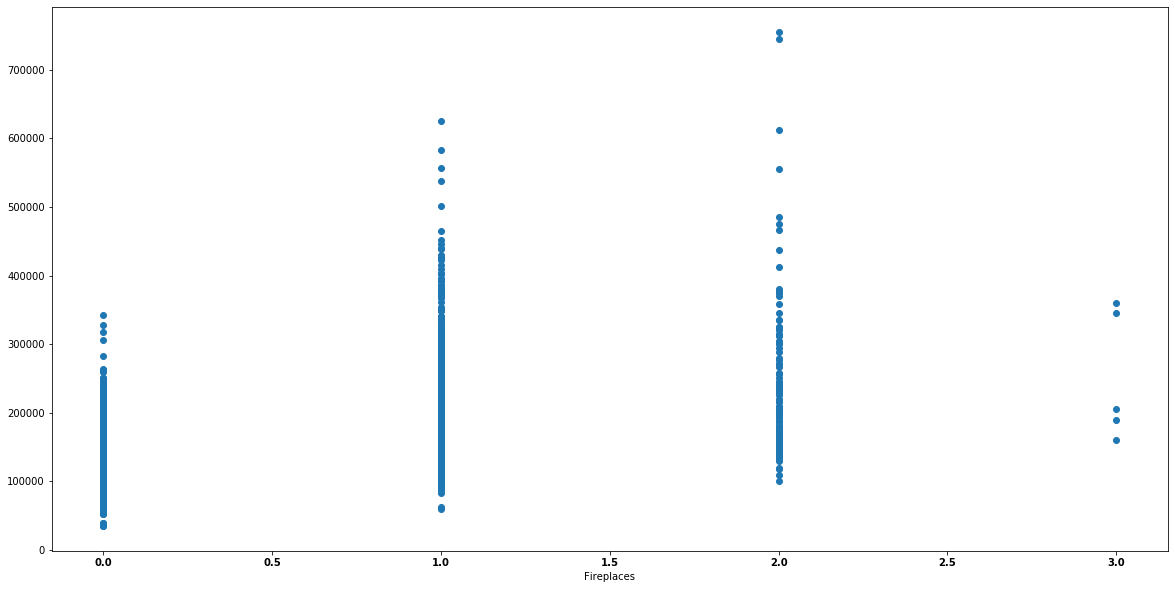

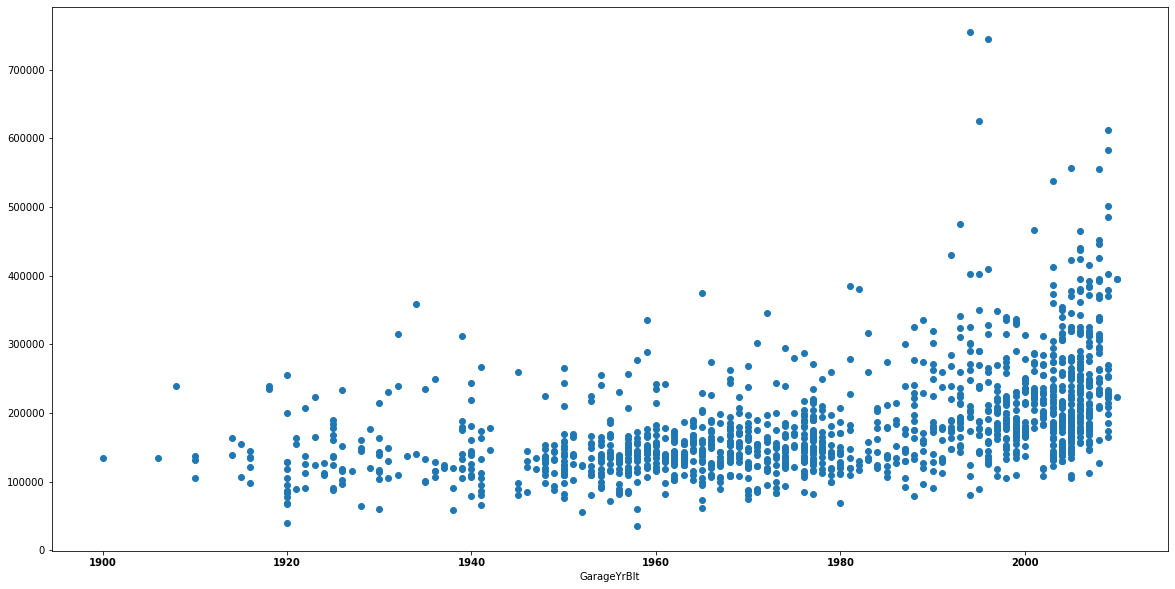

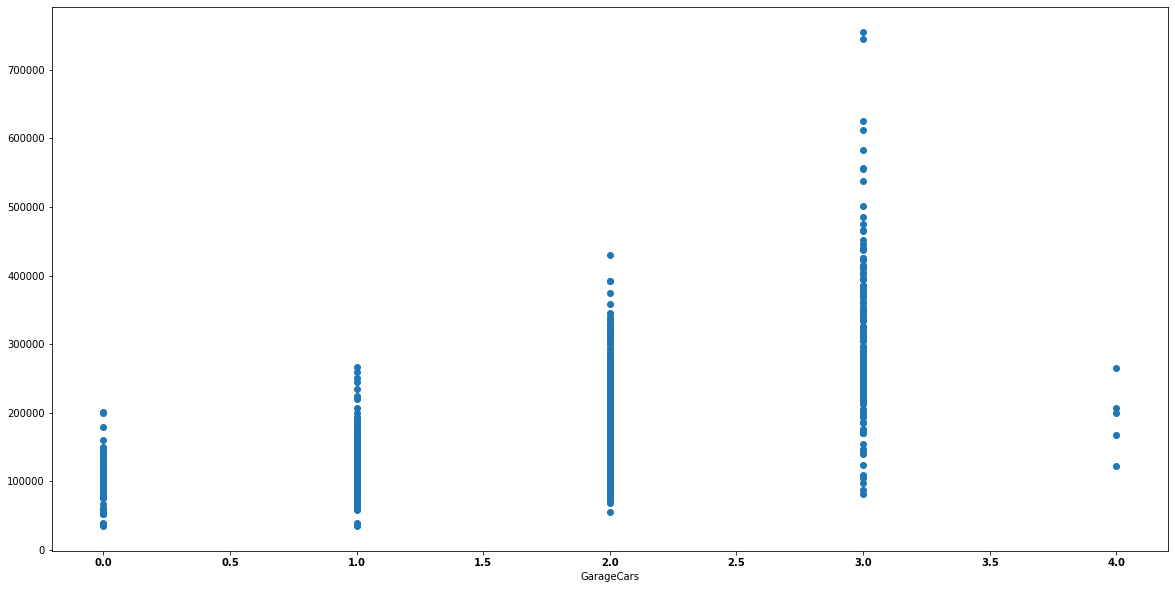

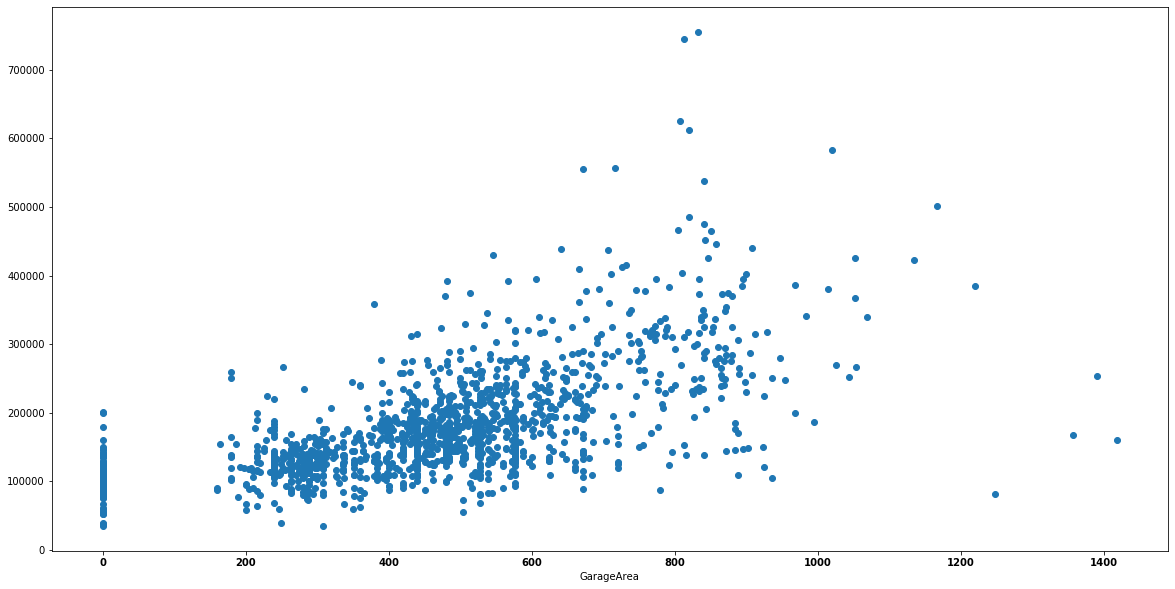

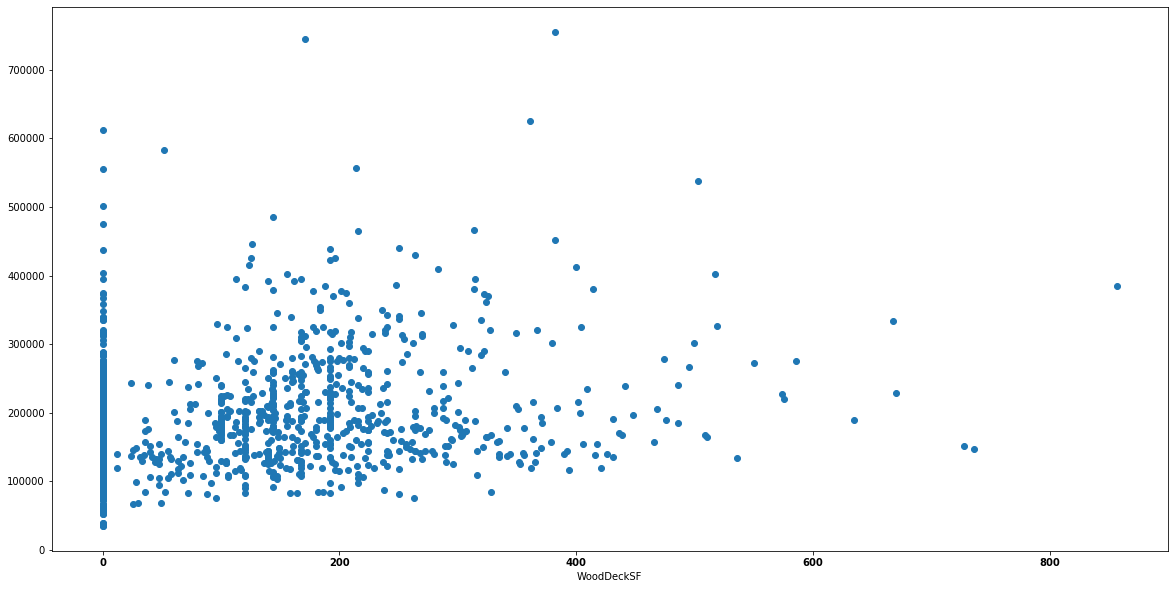

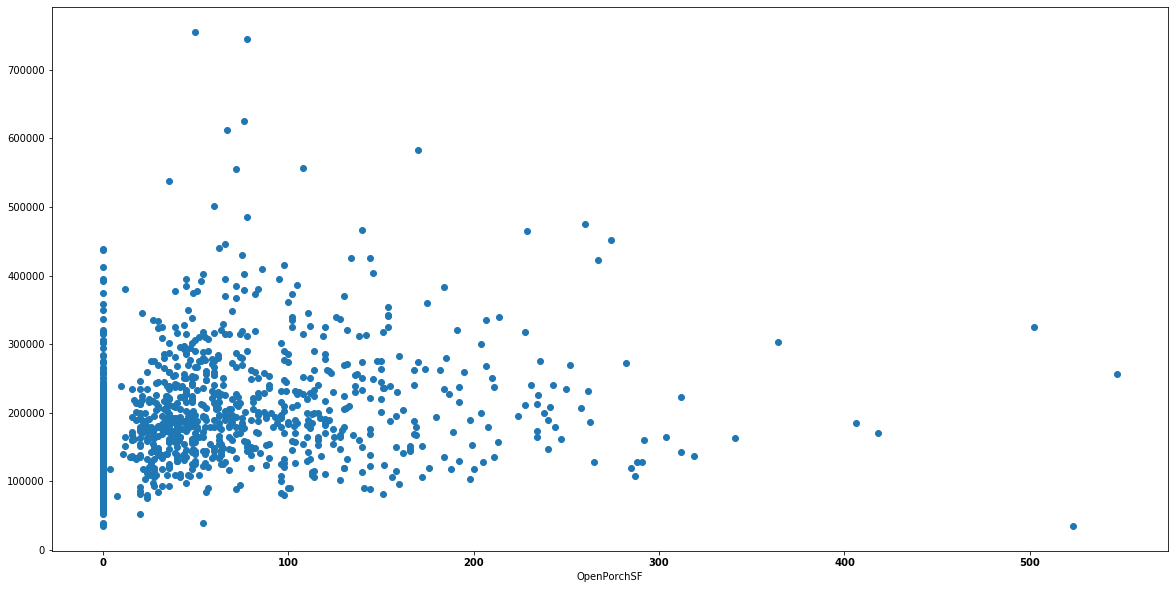

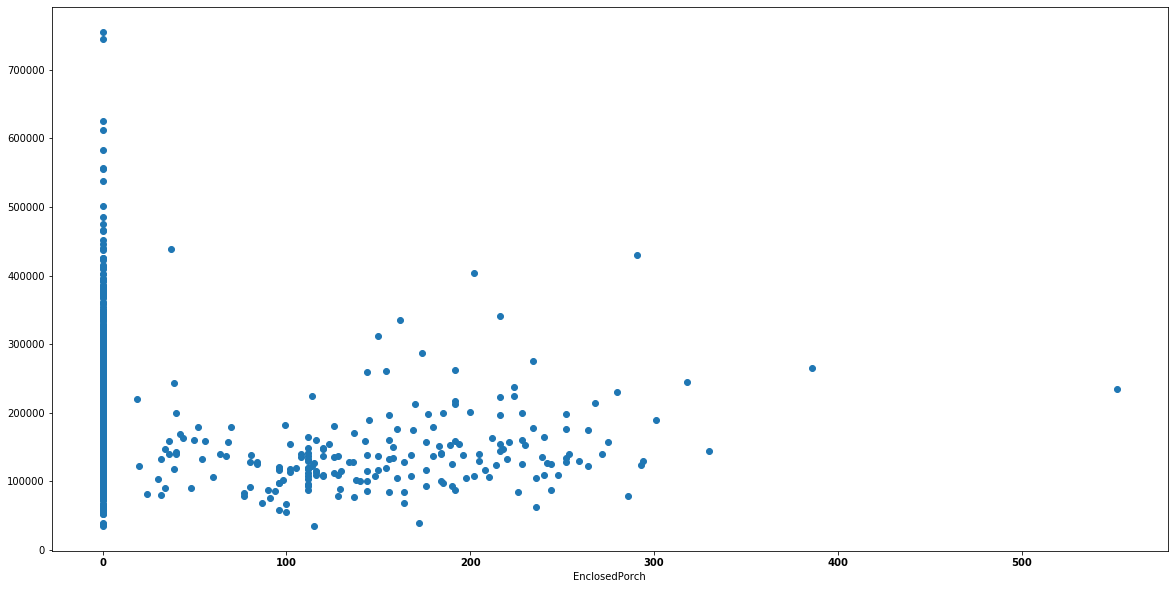

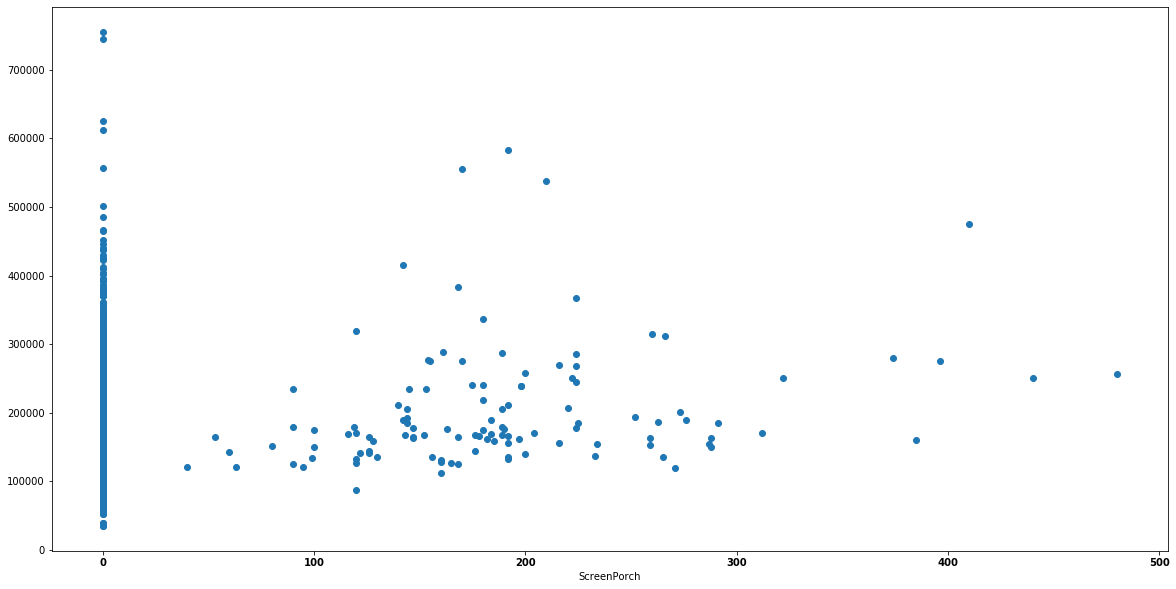

In [13]:
for i in important_features:
    plt.figure(figsize=(20,10))
    plt.scatter(x=i, y="SalePrice", data=train_data)
    plt.xticks(weight='bold')
    plt.xlabel(i)

In [16]:
train_data.drop(train_data[(train_data['OverallQual']<5) & (train_data['SalePrice']>200000)].index, inplace=True)
train_data.drop(train_data[train_data['LotFrontage']>300].index, inplace=True)
train_data.drop(train_data[train_data['LotArea']>100000].index, inplace=True)
train_data.drop(train_data[(train_data['YearBuilt']<2000) & (train_data['SalePrice']>700000)].index, inplace=True)
train_data.drop(train_data[(train_data['YearRemodAdd']<2010) & (train_data['SalePrice']>650000)].index, inplace=True)
train_data.drop(train_data[(train_data['BsmtUnfSF']<1500) & (train_data['SalePrice']>600000)].index, inplace=True)
train_data.drop(train_data[train_data['TotalBsmtSF']>6000].index, inplace=True)
train_data.drop(train_data[train_data['1stFlrSF']>4000].index, inplace=True)
train_data.drop(train_data[(train_data['GrLivArea']>4500) & (train_data['SalePrice']<200000)].index, inplace=True)
train_data.drop(train_data[(train_data['GarageArea']>1200) & (train_data['SalePrice']<300000)].index, inplace=True)

In [17]:
train_data.reset_index(drop=True,inplace=True)

In [18]:
train_data.shape

(1445, 81)

In [19]:
train_data["SalePrice"]=np.log1p(train_data["SalePrice"])

In [20]:
train_SaleP=train_data["SalePrice"]

In [21]:
train_data.drop(["SalePrice"],axis=1,inplace=True)

In [22]:
train_data.shape

(1445, 80)

In [23]:
test_data=pd.read_csv("test.csv")

In [24]:
test_data.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


Combining train and test data for data manipulation

In [25]:
traintest_data=pd.concat([train_data,test_data]).reset_index(drop=True)

In [26]:
traintest_data.shape

(2904, 80)

Data Cleaning and handling missing value

In [27]:
dict_missing={}
for i in traintest_data.columns:
    dict_missing.update({i:traintest_data[i].isnull().mean()})

In [28]:
missing=sorted(dict_missing.items(),key=lambda x:x[1],reverse=True)

In [29]:
missing[0:10]

[('PoolQC', 0.9972451790633609),
 ('MiscFeature', 0.9648760330578512),
 ('Alley', 0.9318181818181818),
 ('Fence', 0.8037190082644629),
 ('FireplaceQu', 0.48863636363636365),
 ('LotFrontage', 0.165633608815427),
 ('GarageYrBlt', 0.05475206611570248),
 ('GarageFinish', 0.05475206611570248),
 ('GarageQual', 0.05475206611570248),
 ('GarageCond', 0.05475206611570248)]

In [30]:
traintest_data_null=pd.DataFrame(traintest_data.isnull().sum(),columns=["number_of_nan"])
traintest_data_null_dtypes=pd.DataFrame(traintest_data.dtypes,columns=["dtypes_of_nan"])
train_data_info=pd.concat([traintest_data_null,traintest_data_null_dtypes],axis=1)

In [31]:
train_data_info

,number_of_nan,dtypes_of_nan
Id,0,int64
MSSubClass,0,int64
MSZoning,4,object
LotFrontage,481,float64
LotArea,0,int64
Street,0,object
Alley,2706,object
LotShape,0,object
LandContour,0,object
Utilities,2,object


In [32]:
traintest_data["Functional"]=traintest_data["Functional"].fillna("Typ")

In [33]:
traintest_data["Electrical"]=traintest_data["Electrical"].fillna(traintest_data["Electrical"].mode()[0])

In [34]:
traintest_data["KitchenQual"]=traintest_data["KitchenQual"].fillna(traintest_data["KitchenQual"].mode()[0])

In [35]:
traintest_data["Exterior1st"]=traintest_data["Exterior1st"].fillna(traintest_data["Exterior1st"].mode()[0])

In [36]:
traintest_data["Exterior2nd"]=traintest_data["Exterior2nd"].fillna(traintest_data["Exterior2nd"].mode()[0])

In [37]:
traintest_data["SaleType"]=traintest_data["SaleType"].fillna(traintest_data["SaleType"].mode()[0])

In [38]:
traintest_data['MSZoning'] = traintest_data.groupby('MSSubClass')['MSZoning'].transform(lambda x: x.fillna(x.mode()[0]))

In [39]:
traintest_data["PoolQC"]=traintest_data["PoolQC"].fillna("None")

In [40]:
for i in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
        traintest_data[i] = traintest_data[i].fillna(0)

In [41]:

for i in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
        traintest_data[i] = traintest_data[i].fillna("None")

In [42]:
for i in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
        traintest_data[i] = traintest_data[i].fillna('None')

In [43]:
traintest_data.groupby("Neighborhood").mean()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
Neighborhood,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Blmngtn,1343.642857,109.285714,46.900000,3399.357143,7.142857,5.000000,2005.035714,2005.464286,41.642857,327.642857,0.000000,979.535714,1307.178571,1404.892857,0.000000,0.000000,1404.892857,0.285714,0.107143,1.928571,0.071429,1.892857,1.000000,6.250000,0.892857,2005.071429,2.321429,492.928571,136.035714,20.071429,0.000000,0.000000,10.285714,0.000000,0.000000,6.142857,2007.428571
Blueste,1783.500000,148.000000,27.300000,2346.500000,6.600000,5.800000,1982.600000,1983.800000,0.000000,293.300000,61.200000,357.900000,712.400000,720.500000,439.200000,0.000000,1159.700000,0.400000,0.000000,1.200000,0.400000,1.900000,1.000000,4.900000,0.900000,1982.600000,2.000000,485.200000,170.100000,11.700000,0.000000,0.000000,0.000000,0.000000,0.000000,6.800000,2008.600000
BrDale,1381.266667,160.000000,21.500000,1840.633333,5.733333,5.433333,1971.833333,1973.000000,363.900000,259.066667,9.800000,294.500000,563.366667,563.366667,551.866667,0.000000,1115.233333,0.133333,0.066667,1.133333,1.000000,2.566667,1.000000,5.733333,0.066667,1908.366667,1.133333,292.000000,77.533333,6.400000,0.000000,0.000000,0.000000,0.000000,0.000000,6.200000,2007.633333
BrkSide,1378.351852,48.518519,55.789474,6959.777778,5.120370,6.212963,1932.361111,1968.370370,10.861111,200.607477,19.850467,543.439252,763.897196,899.361111,330.768519,4.777778,1234.907407,0.233645,0.037383,1.138889,0.157407,2.629630,1.018519,5.768519,0.435185,1731.694444,1.203704,313.981481,46.175926,24.833333,39.009259,2.722222,13.981481,0.000000,41.388889,5.759259,2007.842593
ClearCr,1237.585366,52.926829,88.150000,18675.195122,6.000000,5.512195,1967.243902,1978.829268,76.170732,553.439024,210.804878,421.853659,1186.097561,1350.268293,369.317073,15.097561,1734.682927,0.682927,0.121951,1.609756,0.390244,2.780488,1.000000,6.780488,1.195122,1921.292683,1.731707,470.609756,180.414634,59.073171,35.975610,3.170732,36.341463,0.000000,9.756098,6.341463,2007.878049
CollgCr,1432.644195,42.134831,71.336364,9999.752809,6.677903,5.239700,1997.921348,1999.213483,98.203774,489.565543,27.498127,640.985019,1158.048689,1173.292135,322.827715,0.000000,1496.119850,0.490637,0.022472,1.760300,0.430712,2.835206,1.003745,6.340824,0.441948,1983.588015,2.063670,569.127341,118.191011,52.692884,2.333333,1.456929,6.797753,0.000000,26.029963,6.112360,2007.700375
Crawfor,1563.864078,59.805825,69.951807,11650.106796,6.271845,6.300971,1946.766990,1978.233010,93.196078,471.126214,62.834951,503.194175,1037.155340,1251.475728,467.592233,3.728155,1722.796117,0.388350,0.126214,1.524272,0.388350,2.961165,1.048544,6.932039,1.184466,1957.359223,1.631068,416.854369,63.980583,32.990291,53.582524,8.320388,40.650485,2.213592,42.718447,6.533981,2007.621359
Edwards,1520.875000,55.234375,65.153409,9921.838542,5.000000,5.505208,1956.411458,1974.020833,42.031414,373.062500,47.140625,426.276042,846.479167,1086.244792,207.458333,4.229167,1297.932292,0.434555,0.083770,1.338542,0.182292,2.864583,1.057292,6.041667,0.375000,1586.572917,1.182292,327.562500,69.270833,30.510417,25.473958,0.937500,17.041667,3.843750,124.062500,5.869792,2007.802083
Gilbert,1428.830303,58.000000,74.207207,11342.369697,6.515152,5.090909,1998.303030,1998.993939,40.400000,244.036364,0.684848,630.581818,875.303030,941.278788,679.296970,0.321212,1620.896970,0.260606,0.018182,1.981818,0.824242,3.109091,1.000000,7.048485,0.830303,1998.533333,2.078788,453.800000,105.145455,41.078788,3.454545,5.254545,4.545455,0.000000,32.848485,6.296970,2007.696970


In [44]:
traintest_data["LotFrontage"]=traintest_data.groupby("Neighborhood")["LotFrontage"].apply(lambda x: x.fillna(x.median()))

In [45]:
traintest_data_null=pd.DataFrame(traintest_data.isnull().sum(),columns=["number_of_nan"])
traintest_data_null_dtypes=pd.DataFrame(traintest_data.dtypes,columns=["dtypes_of_nan"])
train_data_info=pd.concat([traintest_data_null,traintest_data_null_dtypes],axis=1)

In [46]:
train_data_info

,number_of_nan,dtypes_of_nan
Id,0,int64
MSSubClass,0,int64
MSZoning,0,object
LotFrontage,0,float64
LotArea,0,int64
Street,0,object
Alley,2706,object
LotShape,0,object
LandContour,0,object
Utilities,2,object


In [47]:
traintest_data["Utilities"]=traintest_data["Utilities"].fillna(traintest_data["Utilities"].mode()[0])

In [48]:
for i in ['MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','BsmtFullBath','BsmtHalfBath']:
    traintest_data[i].fillna(0,inplace=True)

In [49]:
for i in ["Alley","FireplaceQu","Fence","MiscFeature"]:
    traintest_data[i].fillna("None",inplace=True)

Reducing skewness of numeric features using boxcox

In [50]:
numeric_dtypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric = []
for i in traintest_data.columns:
    if traintest_data[i].dtype in numeric_dtypes:
        numeric.append(i)

In [51]:
numeric

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

Selecting skew over a value. In this case, 0.5

In [52]:
skew_features = traintest_data[numeric].apply(lambda x: skew(x)).sort_values(ascending=False)

high_skew = skew_features[skew_features > 0.5]
skew_index = high_skew.index

print("There are {} numerical features with Skew > 0.5 :".format(high_skew.shape[0]))
skewness = pd.DataFrame({'Skew' :high_skew})
skew_features.head(10)

There are 26 numerical features with Skew > 0.5 :


MiscVal          21.923596
PoolArea         18.666208
LowQualFinSF     12.057058
3SsnPorch        11.346145
KitchenAbvGr      4.289456
BsmtFinSF2        4.151849
EnclosedPorch     3.992274
BsmtHalfBath      3.948663
ScreenPorch       3.934735
LotArea           3.566067
dtype: float64

In [53]:
for i in skew_index:
    traintest_data[i] = boxcox1p(traintest_data[i], boxcox_normmax(traintest_data[i] + 1))

/Users/vishalduhan/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/Users/vishalduhan/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:3538: PearsonRNearConstantInputWarning: An input array is nearly constant; the computed correlation coefficent may be inaccurate.
  warnings.warn(PearsonRNearConstantInputWarning())


In [54]:
traintest_data_null=pd.DataFrame(traintest_data.isnull().sum(),columns=["number_of_nan"])
traintest_data_null_dtypes=pd.DataFrame(traintest_data.dtypes,columns=["dtypes_of_nan"])
train_data_info=pd.concat([traintest_data_null,traintest_data_null_dtypes],axis=1)

In [55]:
train_data_info

,number_of_nan,dtypes_of_nan
Id,0,int64
MSSubClass,0,float64
MSZoning,0,object
LotFrontage,0,float64
LotArea,0,float64
Street,0,object
Alley,0,object
LotShape,0,object
LandContour,0,object
Utilities,0,object


In [56]:
traintest_data["MasVnrType"].value_counts()

None       1736
BrkFace     876
Stone       244
BrkCmn       24
Name: MasVnrType, dtype: int64

In [57]:
traintest_data.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,6.552769,RL,26.158006,36.789761,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,3.999383,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,19.749360,Gd,TA,PConc,Gd,TA,No,GLQ,146.097352,Unf,0.000000,30.190314,432.385999,GasA,Ex,Y,SBrkr,6.041465,1182.552960,0.0,9.218305,0.994091,0.000000,2,1.068224,3,0.750934,Gd,2.269133,Typ,0.000000,None,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0.000000,12.044892,0.000000,0.000000,0.0,0.0,None,None,None,0.000000,2,2008,WD,Normal
1,2,4.274559,RL,30.471154,38.166124,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,6.015100,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.000000,TA,TA,CBlock,Gd,TA,Gd,ALQ,184.366991,Unf,0.000000,44.475283,608.759604,GasA,Ex,Y,SBrkr,6.348477,0.000000,0.0,8.763259,0.000000,0.709013,2,0.000000,3,0.750934,TA,2.002171,Typ,0.902716,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,56.576040,0.000000,0.000000,0.000000,0.0,0.0,None,None,None,0.000000,5,2007,WD,Normal
2,3,6.552769,RL,27.041670,39.942189,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,3.999383,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,18.045274,Gd,TA,PConc,Gd,TA,Mn,GLQ,111.853098,Unf,0.000000,57.375605,460.758228,GasA,Ex,Y,SBrkr,6.098785,1200.105022,0.0,9.284077,0.994091,0.000000,2,1.068224,3,0.750934,Gd,2.002171,Typ,0.902716,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0.000000,9.875107,0.000000,0.000000,0.0,0.0,None,None,None,0.000000,9,2008,WD,Normal
3,4,6.920942,RL,24.658795,38.108890,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,3.999383,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.000000,TA,TA,BrkTil,TA,Gd,No,ALQ,62.460259,Unf,0.000000,65.378880,387.534858,GasA,Gd,Y,SBrkr,6.133381,1039.747160,0.0,9.224477,0.994091,0.000000,1,0.000000,3,0.750934,Gd,2.143773,Typ,0.902716,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0.000000,8.943910,16.077499,0.000000,0.0,0.0,None,None,None,0.000000,2,2006,WD,Abnorml
4,5,6.552769,RL,31.580779,42.738223,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,3.999383,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,25.873923,Gd,TA,PConc,Gd,TA,Av,GLQ,138.475021,Unf,0.000000,61.694131,558.743883,GasA,Ex,Y,SBrkr,6.271893,1475.289913,0.0,9.600244,0.994091,0.000000,2,1.068224,4,0.750934,Gd,2.381637,Typ,0.902716,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,42.512591,14.225843,0.000000,0.000000,0.0,0.0,None,None,None,0.000000,12,2008,WD,Normal
5,6,6.133457,RL,31.855797,42.614088,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,3.999383,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.000000,TA,TA,Wood,Gd,TA,No,GLQ,149.921267,Unf,0.000000,17.811864,405.555644,GasA,Ex,Y,SBrkr,5.983557,765.969299,0.0,8.876752,0.994091,0.000000,1,1.068224,1,0.750934,TA,1.839387,Typ,0.000000,None,Attchd,1993.0,Unf,2.0,480.0,TA,TA,Y,14.973473,8.216039,0.000000,7.126414,0.0,0.0,None,MnPrv,Shed,6.838072,10,2009,WD,Normal
6,7,4.274559,RL,29.061466,38.709068,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,3.999383,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,19.267074,Gd,TA,PConc,Ex,TA,Av,GLQ,234.318374,Unf,0.000000,47.519108,785.739651,GasA,Ex,Y,SBrkr,6.578722,0.000000,0.0,9.20

In [58]:
traintest_data["GarageCars"].value_counts()

2.0    1587
1.0     776
3.0     367
0.0     158
4.0      15
5.0       1
Name: GarageCars, dtype: int64

Creating new features

In [59]:
traintest_data['Total_sqr_footage'] = (traintest_data['TotalBsmtSF'] +
                                 traintest_data['1stFlrSF'] + traintest_data['2ndFlrSF'])

In [60]:
traintest_data['has_pool']=traintest_data["PoolArea"].apply(lambda x:1 if x>0 else 0)

In [61]:
traintest_data['has2ndfloor'] = traintest_data['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
traintest_data['hasgarage'] = traintest_data['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
traintest_data['hasbsmt'] = traintest_data['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
traintest_data['hasfireplace'] = traintest_data['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)

In [62]:
traintest_data['YearsafterRemodel'] = traintest_data['YrSold'].astype(int) - traintest_data['YearRemodAdd'].astype(int)

In [63]:
traintest_data['Total_Bathrooms'] = (traintest_data['FullBath'] + (0.5 * traintest_data['HalfBath']) +
                               traintest_data['BsmtFullBath'] + (0.5 * traintest_data['BsmtHalfBath']))

In [64]:
traintest_data["AreaperCar"]=traintest_data['GarageArea']/traintest_data['GarageCars']

In [65]:
traintest_data["AreaperCar"].fillna(0,inplace=True)

In [66]:
traintest_data['Total_porch_sf'] = (traintest_data['OpenPorchSF'] + traintest_data['3SsnPorch'] +
                              traintest_data['EnclosedPorch'] + traintest_data['ScreenPorch'] +
                              traintest_data['WoodDeckSF'])

In [67]:
traintest_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Total_sqr_footage,has_pool,has2ndfloor,hasgarage,hasbsmt,hasfireplace,YearsafterRemodel,Total_Bathrooms,AreaperCar,Total_porch_sf
0,1,6.552769,RL,26.158006,36.789761,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,3.999383,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,19.749360,Gd,TA,PConc,Gd,TA,No,GLQ,146.097352,Unf,0.0,30.190314,432.385999,GasA,Ex,Y,SBrkr,6.041465,1182.552960,0.0,9.218305,0.994091,0.000000,2,1.068224,3,0.750934,Gd,2.269133,Typ,0.000000,None,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0.000000,12.044892,0.000000,0.0,0.0,0.0,None,None,None,0.0,2,2008,WD,Normal,1620.980424,0,1,1,1,0,5,3.528203,274.000000,12.044892
1,2,4.274559,RL,30.471154,38.166124,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,6.015100,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.000000,TA,TA,CBlock,Gd,TA,Gd,ALQ,184.366991,Unf,0.0,44.475283,608.759604,GasA,Ex,Y,SBrkr,6.348477,0.000000,0.0,8.763259,0.000000,0.709013,2,0.000000,3,0.750934,TA,2.002171,Typ,0.902716,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,56.576040,0.000000,0.000000,0.0,0.0,0.0,None,None,None,0.0,5,2007,WD,Normal,615.108081,0,0,1,1,1,31,2.354506,230.000000,56.576040
2,3,6.552769,RL,27.041670,39.942189,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,3.999383,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,18.045274,Gd,TA,PConc,Gd,TA,Mn,GLQ,111.853098,Unf,0.0,57.375605,460.758228,GasA,Ex,Y,SBrkr,6.098785,1200.105022,0.0,9.284077,0.994091,0.000000,2,1.068224,3,0.750934,Gd,2.002171,Typ,0.902716,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0.000000,9.875107,0.000000,0.0,0.0,0.0,None,None,None,0.0,9,2008,WD,Normal,1666.962036,0,1,1,1,1,6,3.528203,304.000000,9.875107
3,4,6.920942,RL,24.658795,38.108890,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,3.999383,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.000000,TA,TA,BrkTil,TA,Gd,No,ALQ,62.460259,Unf,0.0,65.378880,387.534858,GasA,Gd,Y,SBrkr,6.133381,1039.747160,0.0,9.224477,0.994091,0.000000,1,0.000000,3,0.750934,Gd,2.143773,Typ,0.902716,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0.000000,8.943910,16.077499,0.0,0.0,0.0,None,None,None,0.0,2,2006,WD,Abnorml,1433.415400,0,1,1,1,1,36,1.994091,214.000000,25.021410
4,5,6.552769,RL,31.580779,42.738223,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,3.999383,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,25.873923,Gd,TA,PConc,Gd,TA,Av,GLQ,138.475021,Unf,0.0,61.694131,558.743883,GasA,Ex,Y,SBrkr,6.271893,1475.289913,0.0,9.600244,0.994091,0.000000,2,1.068224,4,0.750934,Gd,2.381637,Typ,0.902716,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,42.512591,14.225843,0.000000,0.0,0.0,0.0,None,None,None,0.0,12,2008,WD,Normal,2040.305689,0,1,1,1,1,8,3.528203,278.666667,56.738435


In [68]:
traintest_data.drop(["Utilities","Street","PoolQC"],axis=1,inplace=True)

Creating features of non-numeric features using get_dummies

In [69]:
traintest_data=pd.get_dummies(traintest_data)

In [70]:
traintest_data.shape

(2904, 304)

Splitting data into train and test set

In [71]:
X = traintest_data.iloc[:len(train_SaleP), :]
X_test = traintest_data.iloc[len(train_SaleP):, :]
X.shape, train_SaleP.shape, X_test.shape

((1445, 304), (1445,), (1459, 304))

# Random Forest

In [72]:
rf = RandomForestRegressor(n_estimators=600,
                          max_depth=25,
                          min_samples_split=4,
                          min_samples_leaf=4,
                          max_features=None,
                          oob_score=True,
                          random_state=42)

In [73]:
rf_fit=rf.fit(X, train_SaleP)

In [74]:
rf_pred=rf.predict(X)

In [75]:
np.sqrt(mean_squared_error(train_SaleP,rf_pred))

0.07787513970540619

In [76]:
error_rf=np.sqrt(-cross_val_score(rf,X,train_SaleP,cv=10,scoring='neg_mean_squared_error'))

In [77]:
error_rf.mean()

0.13651833804640368

In [79]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [15,20,10,25],
    'max_features': [None],
    'min_samples_leaf': [4,5,6,7],
    'min_samples_split': [4,5,6,7],
    'n_estimators': [600,800,1000,1200]
}

grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 10, n_jobs = -1, verbose = 2)

grid_search.fit(X, train_SaleP)

#grid_search.best_params_
{'bootstrap': True,
 'max_depth': 25,
 'max_features': None,
 'min_samples_leaf': 4,
 'min_samples_split': 4,
 'n_estimators': 600}

# SVR

In [81]:
svr=make_pipeline(RobustScaler(), SVR(C= 20, epsilon= 0.008, gamma=0.0003))

In [82]:
error_svr=np.sqrt(-cross_val_score(svr,X,train_SaleP,cv=12,scoring='neg_mean_squared_error'))

In [83]:
error_svr.mean()

0.10792458290698653

In [84]:
svr_fit=svr.fit(X, train_SaleP)

In [85]:
svr_pred=svr.predict(X)

In [86]:
np.sqrt(mean_squared_error(train_SaleP,svr_pred))

0.08895876679634554

# Gradient Boosting Regressor

In [87]:
gbr = GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features='sqrt', max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=9, min_samples_split=8,
                          min_weight_fraction_leaf=0.0, n_estimators=1250,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=0.9, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

gbr_fit = gbr.fit(X,train_SaleP)
gbr_pred=gbr.predict(X)
np.sqrt(mean_squared_error(train_SaleP,gbr_pred))

0.03622503482589256

In [88]:
error_gbr=np.sqrt(-cross_val_score(gbr,X,train_SaleP,cv=12,scoring='neg_mean_squared_error'))

In [89]:
error_gbr.mean()

0.1174794364221264

In [ ]:
param_grid = {'min_samples_split':[2,4,6,8,10,20,40,60,100], 
              'min_samples_leaf':[1,3,5,7,9, 15, 20, 25, 30, 40, 50],
              'subsample':[0.7,0.75,0.8,0.85,0.9,0.95,1],
              'learning_rate':[0.15,0.1,0.05,0.01,0.005,0.001, 0.2], 
              'n_estimators':[10, 30, 50, 100,250,500,750,1000,1250,1500,1750],
              'max_features' : ['sqrt']
             }

gbr_grid = GradientBoostingRegressor()
clf = RandomizedSearchCV(gbr_grid, param_grid, scoring='r2')
 
clf.fit(X,train_SaleP)

print(clf.best_estimator_)

# stacking cv regressor

In [90]:
stack = StackingCVRegressor(regressors=(svr, gbr, rf),
                                meta_regressor=svr,
                                use_features_in_secondary=True)

In [91]:
stack_fit = stack.fit(X,train_SaleP)
stack_pred=stack.predict(X)
np.sqrt(mean_squared_error(train_SaleP,stack_pred))

0.07691848727840256

In [93]:
error_stack=np.sqrt(-cross_val_score(stack,X,train_SaleP,cv=12,scoring='neg_mean_squared_error'))

In [94]:
error_stack.mean()

0.10710854562725368

Random Forest 0.136
SVR 0.107
Gradient Boosting Regressor 0.117
STACKING CV REGRESSOR 0.107
Here, all the models will try to overfit the data to different extent so final answer should be based on all the models with different weightage.

# Blending

In [105]:
np.expm1(0.40*stack.predict(X_test)+0.30*svr.predict(X_test)+0.25*gbr.predict(X_test)+0.05*rf.predict(X_test))

array([120362.55695008, 163270.71224041, 193659.75466321, ...,
       174861.21073768, 111117.48062329, 226453.14303973])

# Submission


In [110]:
pred2=np.expm1(0.40*stack.predict(X_test)+0.30*svr.predict(X_test)+0.25*gbr.predict(X_test)+0.05*rf.predict(X_test))
submitfile=pd.read_csv("sample_submission.csv")
submitfile.iloc[:,1]=pred2
submitfile.to_csv("outputs.csv",index=False)

In [111]:
pred2

array([120362.55695008, 163270.71224041, 193659.75466321, ...,
       174861.21073768, 111117.48062329, 226453.14303973])